In [1]:
import pandas as pd


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('SuperMercados.xlsx')

In [3]:
df

,Unnamed: 0,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Normal,M,Saúde e beleza,605.25,1,605.25,1/29/2019,13:46:00,PIX,363.1500,4761904762,20175,62
996,996,303-96-2227,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,3/2/2019,17:16:00,PIX,10224.9000,4761904762,4869,44
997,997,727-02-1313,A,Member,M,Comida e bebidas,477.60,1,477.60,2/9/2019,13:22:00,Dinheiro,405.9600,4761904762,1592,77
998,998,347-56-2442,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,2/22/2019,15:33:00,Dinheiro,691.1100,4761904762,3291,41


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

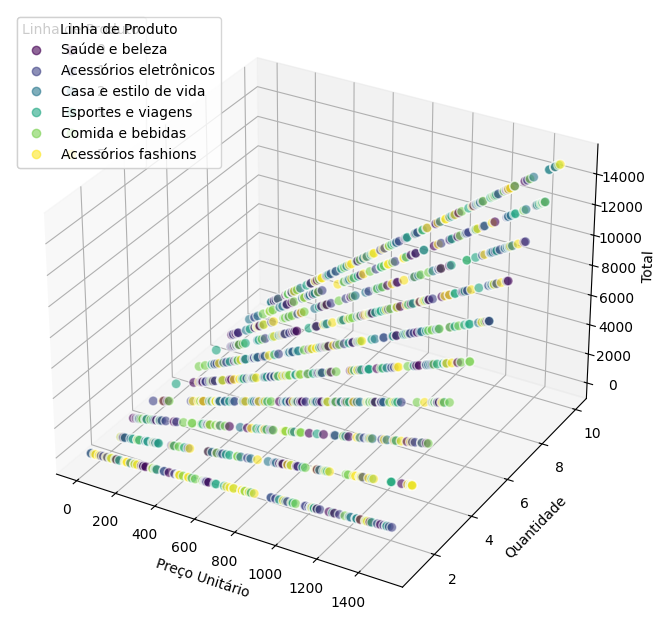

In [6]:

# Mapeia as linhas de produto para um valor numérico e cria uma nova coluna para as cores
linha_produto_unicas = df['Linha de produto'].unique()
cores_linha_produto = range(len(linha_produto_unicas))
mapa_cores = dict(zip(linha_produto_unicas, cores_linha_produto))
df['Cor Linha Produto'] = df['Linha de produto'].map(mapa_cores)

# Criação do gráfico
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df['Preço unitário'],
    df['Quantidade'],
    df['Total'],
    c=df['Cor Linha Produto'],  # Cor baseada na linha de produto
    s=50,                       # Tamanho fixo dos pontos, pode ser ajustado conforme necessário
    cmap='viridis',             # Mapa de cores
    alpha=0.6,
    edgecolors='w'
)

# Títulos e etiquetas
ax.set_xlabel('Preço Unitário')
ax.set_ylabel('Quantidade')
ax.set_zlabel('Total')

#Legenda para as linhas de produto
legend1 = ax.legend(*scatter.legend_elements(), title="Linha de Produto")
ax.add_artist(legend1)

# Cria legendas baseadas nos nomes das linhas de produto
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, linha_produto_unicas, title="Linha de Produto", loc="upper left")

# Mostrar o gráfico
plt.show()